# preferable do the following in a virtual environment as tensorflow needs to be downgraded to v1 to be compatible with sagemaker

In [ ]:
!pip install tensorflow==1.15.5

In [17]:
pip install tensorflow==2.8.0

     |████████████████████████████████| 217.4 MB 9.4 kB/s  eta 0:00:01  |▏                               | 1.2 MB 279 kB/s eta 0:12:54     |██▉                             | 19.0 MB 16.1 MB/s eta 0:00:13     |█████████████████████████████   | 197.7 MB 16.8 MB/s eta 0:00:02
     |████████████████████████████████| 17.6 MB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 15.9 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 

In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
#from keras.models import Sequential
#from keras import models, layers
#from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LSTM, GRU, Bidirectional

In [2]:
#make sure the tensorflow version using is 1.15.5
tf.__version__

'2.7.0'

In [3]:
dataset_p1 = 'keypoint_part1.csv'
dataset_p2 = 'keypoint_part2.csv'
dataset_p3 = 'keypoint_part3.csv'
dataset_p4 = 'data.csv'
model_save_path = 'newModel.hdf5'

In [4]:
'''
#shuffle data
import pandas as pd
df = pd.read_csv(dataset_p4, header=None)
ds = df.sample(frac=1)
ds.to_csv(dataset_p4)
'''

'\n#shuffle data\nimport pandas as pd\ndf = pd.read_csv(dataset_p4, header=None)\nds = df.sample(frac=1)\nds.to_csv(dataset_p4)\n'

In [5]:
NUM_CLASSES = 29
RANDOM_SEED = 42

In [6]:
X_dataset1 = np.loadtxt(dataset_p1, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset1 = np.loadtxt(dataset_p1, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_dataset2 = np.loadtxt(dataset_p2, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset2 = np.loadtxt(dataset_p2, delimiter=',', dtype='int32', usecols=(0))
y_dataset2 = y_dataset2+10

In [8]:
X_dataset3 = np.loadtxt(dataset_p3, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset3 = np.loadtxt(dataset_p3, delimiter=',', dtype='int32', usecols=(0))
y_dataset3 = y_dataset3+20

In [9]:
X_dataset4 = np.loadtxt(dataset_p4, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset4 = np.loadtxt(dataset_p4, delimiter=',', dtype='int32', usecols=(0))

In [10]:
concat_x = np.concatenate((X_dataset1,X_dataset2),axis=0)
concat_x = np.concatenate((concat_x,X_dataset3),axis=0)
concat_x = np.concatenate((concat_x,X_dataset4),axis=0)

In [11]:
concat_y = np.concatenate((y_dataset1,y_dataset2),axis=0)
concat_y = np.concatenate((concat_y,y_dataset3),axis=0)
concat_y = np.concatenate((concat_y,y_dataset4),axis=0)
print(concat_y.shape)

(70789,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(concat_x, concat_y, train_size=0.75, random_state=RANDOM_SEED)

In [13]:
concat_x.shape

(70789, 42)

In [14]:
### Validation data
x_train_split, x_valid_split, y_train_split, y_valid_split = train_test_split(X_train
                                                                              ,y_train
                                                                              ,test_size=.2
                                                                              ,random_state=RANDOM_SEED
                                                                              ,shuffle=True)

In [42]:

model = tf.keras.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(29, activation='softmax')
])

In [43]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1024)              44032     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 29)                14877     
Total params: 583,709
Trainable params: 583,709
Non-trainable params: 0
_________________________________________________________________


In [44]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

In [45]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
#import numpy as np
#series_input_train = np.expand_dims(X_train, axis=-1)

In [47]:
#best model 9.1Mb : loss: 0.3844 - accuracy: 0.8755 - val_loss: 0.3243 - val_accuracy: 0.8951 
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=512,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback,tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)]
)

Train on 53091 samples, validate on 17698 samples
Epoch 1/1000


2022-05-17 00:00:51.973998: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-05-17 00:00:52.003180: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb626666c50 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-17 00:00:52.003198: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


52224/53091 [============================>.] - ETA: 0s - loss: 1.0698 - acc: 0.7068
Epoch 00001: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 73us/sample - loss: 1.0602 - acc: 0.7093 - val_loss: 0.4583 - val_acc: 0.8759
Epoch 2/1000
52736/53091 [============================>.] - ETA: 0s - loss: 0.4202 - acc: 0.8859
Epoch 00002: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 68us/sample - loss: 0.4198 - acc: 0.8861 - val_loss: 0.3201 - val_acc: 0.9191
Epoch 3/1000
52736/53091 [============================>.] - ETA: 0s - loss: 0.3280 - acc: 0.9095
Epoch 00003: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 78us/sample - loss: 0.3278 - acc: 0.9095 - val_loss: 0.2718 - val_acc: 0.9261
Epoch 4/1000
52224/53091 [============================>.] - ETA: 0s - loss: 0.2792 - acc: 0.9222
Epoch 00004: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 70us/sample - loss:

Epoch 32/1000
52224/53091 [============================>.] - ETA: 0s - loss: 0.0943 - acc: 0.9698
Epoch 00032: saving model to newModel.hdf5
53091/53091 [==============================] - 5s 95us/sample - loss: 0.0950 - acc: 0.9694 - val_loss: 0.1101 - val_acc: 0.9684
Epoch 33/1000
52736/53091 [============================>.] - ETA: 0s - loss: 0.0936 - acc: 0.9689
Epoch 00033: saving model to newModel.hdf5
53091/53091 [==============================] - 3s 65us/sample - loss: 0.0936 - acc: 0.9688 - val_loss: 0.1050 - val_acc: 0.9689
Epoch 34/1000
52736/53091 [============================>.] - ETA: 0s - loss: 0.0892 - acc: 0.9707
Epoch 00034: saving model to newModel.hdf5
53091/53091 [==============================] - 3s 58us/sample - loss: 0.0893 - acc: 0.9707 - val_loss: 0.1089 - val_acc: 0.9676
Epoch 35/1000
52736/53091 [============================>.] - ETA: 0s - loss: 0.0891 - acc: 0.9702
Epoch 00035: saving model to newModel.hdf5
53091/53091 [==============================] - 3s 59

Epoch 63/1000
52224/53091 [============================>.] - ETA: 0s - loss: 0.0592 - acc: 0.9797
Epoch 00063: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 67us/sample - loss: 0.0592 - acc: 0.9797 - val_loss: 0.0997 - val_acc: 0.9732
Epoch 64/1000
52736/53091 [============================>.] - ETA: 0s - loss: 0.0586 - acc: 0.9794
Epoch 00064: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 67us/sample - loss: 0.0588 - acc: 0.9793 - val_loss: 0.0991 - val_acc: 0.9732
Epoch 65/1000
52224/53091 [============================>.] - ETA: 0s - loss: 0.0577 - acc: 0.9803
Epoch 00065: saving model to newModel.hdf5
53091/53091 [==============================] - 3s 66us/sample - loss: 0.0579 - acc: 0.9802 - val_loss: 0.1000 - val_acc: 0.9734
Epoch 66/1000
52736/53091 [============================>.] - ETA: 0s - loss: 0.0565 - acc: 0.9808
Epoch 00066: saving model to newModel.hdf5
53091/53091 [==============================] - 4s 69

In [48]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=512)

17698/17698 [==============================] - 0s 20us/sample - loss: 0.1048 - acc: 0.9747


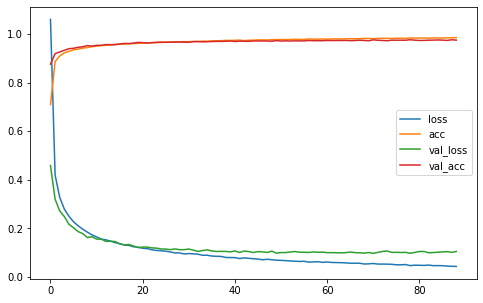

In [51]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# Save Model

In [52]:
model.save(model_save_path, include_optimizer=False)

# Visualize

In [15]:
model = tf.keras.models.load_model(model_save_path)
predict_result = model.predict(np.array([X_test[0]]))
#print(np.squeeze(predict_result))
#print(np.argmax(np.squeeze(predict_result)))

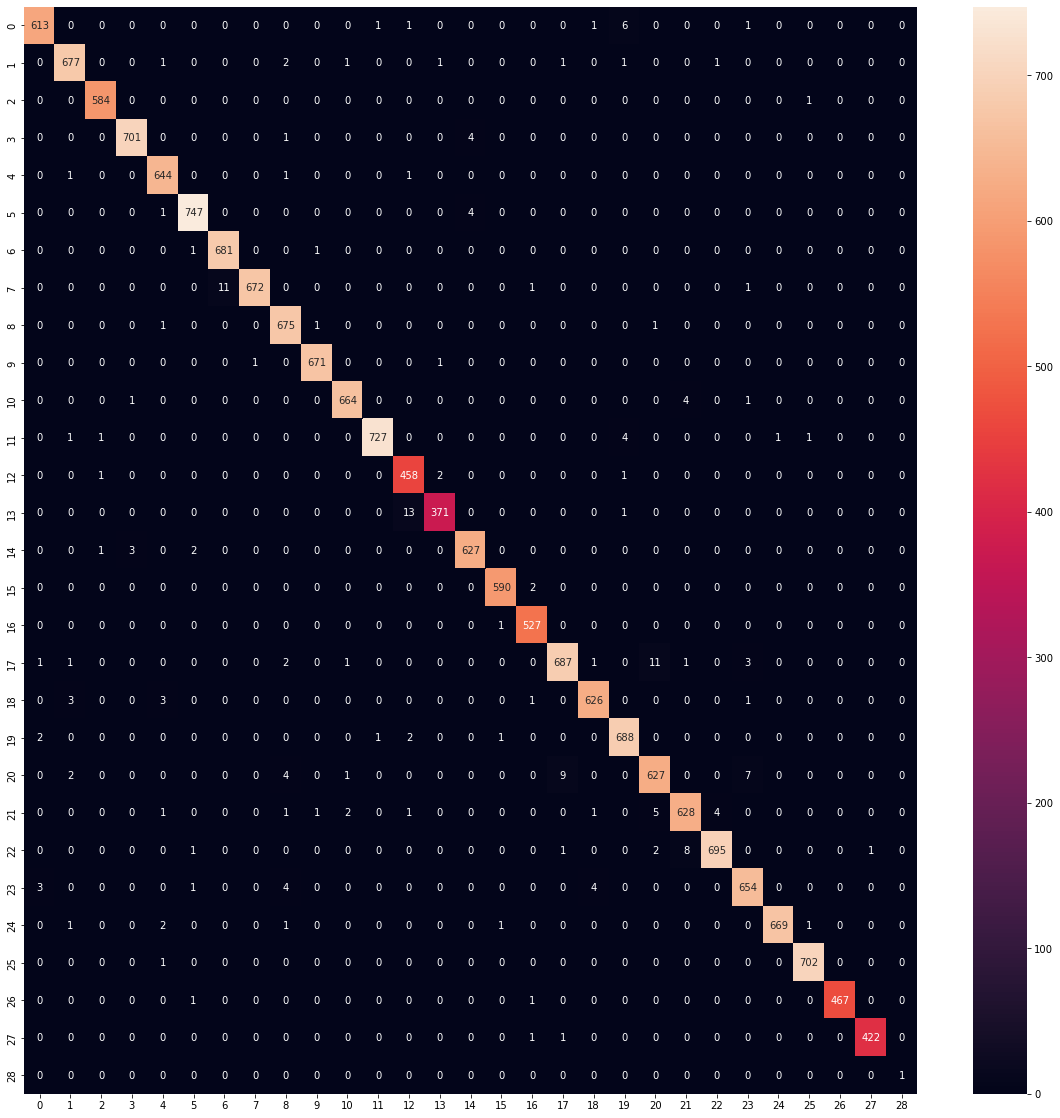

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       623
           1       0.99      0.99      0.99       685
           2       0.99      1.00      1.00       585
           3       0.99      0.99      0.99       706
           4       0.98      1.00      0.99       647
           5       0.99      0.99      0.99       752
           6       0.98      1.00      0.99       683
           7       1.00      0.98      0.99       685
           8       0.98      1.00      0.99       678
           9       1.00      1.00      1.00       673
          10       0.99      0.99      0.99       670
          11       1.00      0.99      0.99       735
          12       0.96      0.99      0.98       462
          13       0.99      0.96      0.98       385
          14       0.99      0.99      0.99       633
          15       0.99      1.00      1.00       592
          16       0.99      1.00      0.99       528
     

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)